In [190]:
import textract

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from pdfminer.pdfpage import PDFPage

In [191]:
import re
import unidecode
from unicodedata import normalize

archivo = "ThesisULorraineFinal.pdf"
text = textract.process(archivo, extension='pdf',method='pdftotext',encodign="utf-8")

text = text.decode('utf8').encode('ascii', errors='ignore')
text = str(text).replace(r"^[a-zA-Z]+$","")
text = re.sub(r'[0-9()\[\]]+', '', text)
text = text.replace("\\", "") 

text = unidecode.unidecode(text)

text = text.lower()

In [192]:
english_stopwords = stopwords.words('english')
non_words = list(punctuation)

non_words.extend(['¿', '¡',"\ ","ns" ,"nt","nz","nr","ni", "nk","nZ",
                 'de','(.)','la','(,','r','en','()','[,','un','n', 'k',
                  '())','.\\n[]','))','(t)','x)','[]', '(.),','l','c','.,'
                 ,'];',':=','..','[],',"\\'",'),','(,t','\\\\','(t,','(u',',t',
                 '.n',"nn","nna","nnn","nnnn", "dun","tn"])
non_words.extend(map(str,range(10)))
stop_words=non_words+english_stopwords


In [193]:
freq = {}
for word in text.split():
    if word not in stop_words:
        freq[word] = freq.setdefault(word,0)+1
dict(sorted(freq.items(), key=lambda x: x[1], reverse = True))

{'u': 364,
 'x': 212,
 'v': 208,
 'h': 192,
 'equations': 172,
 'using': 168,
 'dx': 166,
 'granular': 163,
 'el': 156,
 'equation': 155,
 'uk': 151,
 'fluid': 145,
 'deduce': 144,
 'du': 141,
 'que': 134,
 'dxdt': 133,
 'et': 131,
 'le': 128,
 'section': 122,
 'f': 119,
 'dans': 118,
 'p': 118,
 'q': 117,
 'constitutive': 113,
 'following': 109,
 'mixture': 106,
 'les': 106,
 'body': 103,
 'rigid': 98,
 't,': 96,
 'est': 96,
 'function': 95,
 'nnb': 95,
 'w': 93,
 'des': 92,
 'weak': 89,
 'balance': 86,
 'nous': 86,
 'a.': 84,
 'es': 81,
 'model': 80,
 'limit': 80,
 'then,': 80,
 'since': 80,
 'para': 78,
 'solution': 78,
 'material': 76,
 'consider': 75,
 'system': 75,
 'pour': 74,
 'define': 74,
 'una': 74,
 'dense': 73,
 ':,': 71,
 'energy': 70,
 'bingham': 70,
 'inequality': 70,
 'boundary': 70,
 'strongly': 70,
 'theory': 68,
 'solid': 68,
 'velocity': 66,
 'b': 66,
 'existence': 66,
 'del': 66,
 'let': 66,
 'c,': 62,
 'las': 61,
 'obtain': 60,
 'term': 60,
 'motion': 60,
 'se': 

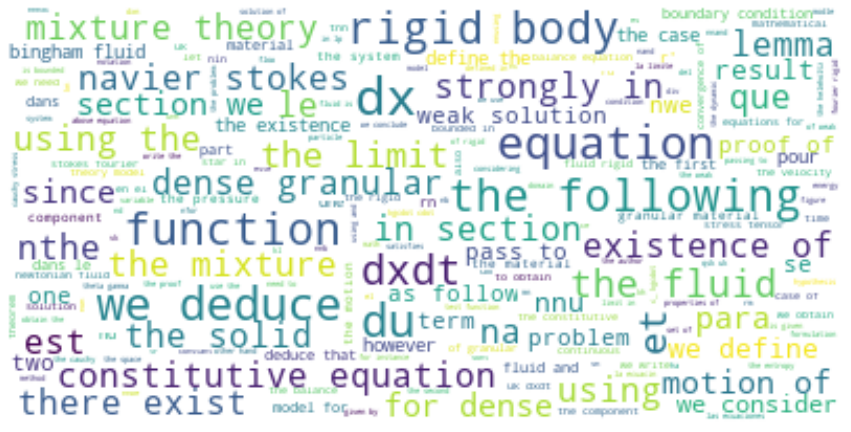

In [195]:
ns_equation="navier_stokes_eq.jpg"
custom_mask = np.array(Image.open(ns_equation))

wordcloud = WordCloud(stopwords = stop_words,max_font_size=25,  background_color="white")
wordcloud.generate(text)


#image_colors = ImageColorGenerator(custom_mask)
#wordcloud.recolor(color_func=image_colors)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_thesis.png")
plt.show()


In [132]:
import PyPDF2 
  
# creating a pdf file object 
pdfFileObj = open('ThesisULorraineFinal.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
# printing number of pages in pdf file 
print(pdfReader.numPages) 
  
# creating a page object 
pageObj = pdfReader.getPage(231) 
textract.process(archivo, extension='pdf',method='pdfminer')
# extracting text from page 
print(pageObj.extractText().encode('utf-8').decode("utf-8")) 
  
# closing the pdf file object 
pdfFileObj.close() 

232
Abstract
ThisPh.D.thesisaimstoobtainandtodevelopsomemathematicalmodelstounderstand
someaspectsofthedynamicsofheterogeneousgranularßuids.Moreprecisely,theexpectedresult
istodevelopthreemodels,onewherethedynamicsofthegranularmaterialismodeledusing
amixturetheoryapproach,andtheothertwo,whereweconsiderthegranularßuidismodeled
usingamultiphaseapproachinvolvingrigidstructuresandßuids.Moreprecisely:
ÑIntheÞrstmodel,weobtainedasetofequationsbasedonthemixturetheoryusing
homogenizationtoolsandathermodynamicprocedure.Theseequationsreßecttwoes-
sentialpropertiesofgranularßuids:theviscousnatureoftheinterstitialßuidanda
Coulomb-typeofbehaviorofthegranularcomponent.Withourequations,westudythe
problemofadensegranularheterogeneousßow,composedbyaNewtonianßuidanda
solidcomponentinthesettingoftheCouetteßowbetweentwoinÞnitecylinders.
ÑInthesecondmodel,weconsiderthemotionofarigidbodyinaviscoplasticmaterial.The
3DBinghamequationsmodelthismaterial,andtheNewtonlawsgovernthedisplacement
oftherigidbody.Ourma